In [159]:
import pandas as pd
import numpy as np

In [160]:
df = pd.read_csv('spam.csv', encoding='latin1')    

## 1. Data Cleaning

In [161]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [163]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [164]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [165]:
# rename 
df.rename(columns = {'v1':'Target','v2':'SMS'},inplace = True)

In [166]:
df.isna().sum()

Target    0
SMS       0
dtype: int64

In [167]:
df.duplicated().sum()

403

In [168]:
df.shape

(5572, 2)

In [169]:
df.drop_duplicates(inplace = True)

In [170]:
df.shape

(5169, 2)

In [171]:
df.head(2)

,Target,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


## 2. EDA(Exoloratory Data Analysis)

In [172]:
df['Target'].value_counts()

Target
ham     4516
spam     653
Name: count, dtype: int64

In [173]:
import matplotlib.pyplot as plt


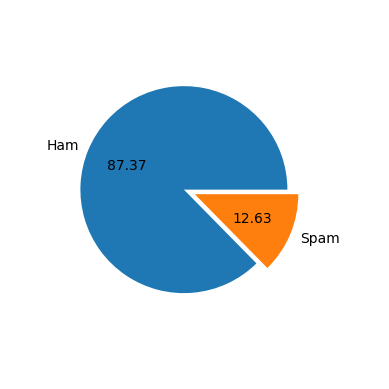

In [174]:
plt.pie(df['Target'].value_counts(), labels = ['Ham','Spam'],autopct='%0.2f',explode =(0.08,0),radius =0.7)
plt.show()

In [175]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [176]:
def word_tokenize(data):
    data = nltk.word_tokenize(data)
    return len(data)

def sentence_tokenize(data):
    data = nltk.sent_tokenize(data)
    return len(data)

def num_characters(data):
    return len(data)

In [177]:
# i will add counts of words, no. of characters , no. of sentences columns in dataframe
df['num_words'] = df['SMS'].apply(word_tokenize)
df['num_sentence'] = df['SMS'].apply(sentence_tokenize)
df['num_alphabates'] = df['SMS'].apply(num_characters)

In [178]:
df

,Target,SMS,num_words,num_sentence,num_alphabates
0,ham,"Go until jurong point, crazy.. Available only ...",24,2,111
1,ham,Ok lar... Joking wif u oni...,8,2,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,ham,U dun say so early hor... U c already then say...,13,1,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",15,1,61
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,35,4,161
5568,ham,Will Ì_ b going to esplanade fr home?,9,1,37
5569,ham,"Pity, * was in mood for that. So...any other s...",15,2,57
5570,ham,The guy did some bitching but I acted like i'd...,27,1,125


In [179]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

In [180]:
# checking these columns behaviour for ham and spam seperately 
ham = df[df['Target'] == 0]
spam = df[df['Target'] == 1]


In [181]:
df

,Target,SMS,num_words,num_sentence,num_alphabates
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111
1,0,Ok lar... Joking wif u oni...,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,0,U dun say so early hor... U c already then say...,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,4,161
5568,0,Will Ì_ b going to esplanade fr home?,9,1,37
5569,0,"Pity, * was in mood for that. So...any other s...",15,2,57
5570,0,The guy did some bitching but I acted like i'd...,27,1,125


In [182]:
spam.describe()

,Target,num_words,num_sentence,num_alphabates
count,653.0,653.000000,653.000000,653.000000
mean,1.0,27.667688,2.970904,137.891271
std,0.0,7.008418,1.488425,30.137753
min,1.0,2.000000,1.000000,13.000000
25%,1.0,25.000000,2.000000,132.000000
50%,1.0,29.000000,3.000000,149.000000
75%,1.0,32.000000,4.000000,157.000000
max,1.0,46.000000,9.000000,224.000000


In [183]:
ham.describe()

,Target,num_words,num_sentence,num_alphabates
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,17.123782,1.820195,70.459256
std,0.0,13.493970,1.383657,56.358207
min,0.0,1.000000,1.000000,2.000000
25%,0.0,8.000000,1.000000,34.000000
50%,0.0,13.000000,1.000000,52.000000
75%,0.0,22.000000,2.000000,90.000000
max,0.0,220.000000,38.000000,910.000000


In [184]:
import seaborn as sns

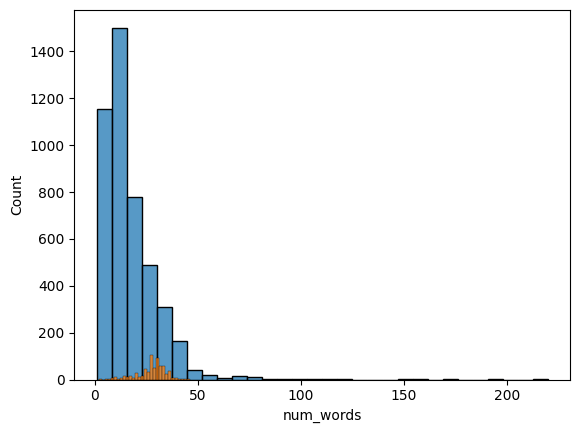

In [185]:
sns.histplot(ham['num_words'],bins = 30)
sns.histplot(spam['num_words'],bins = 30)
plt.show()

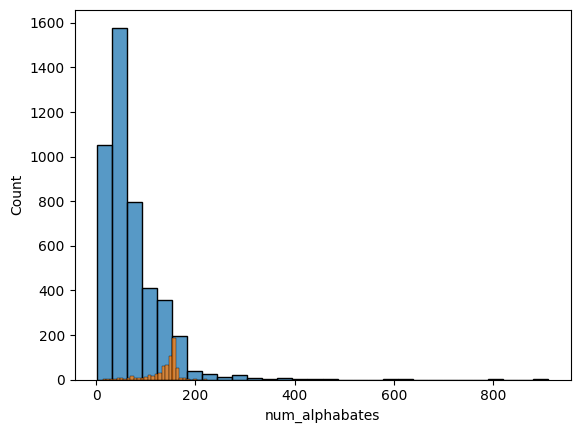

In [186]:
sns.histplot(ham['num_alphabates'],bins = 30)
sns.histplot(spam['num_alphabates'],bins = 30)
plt.show()

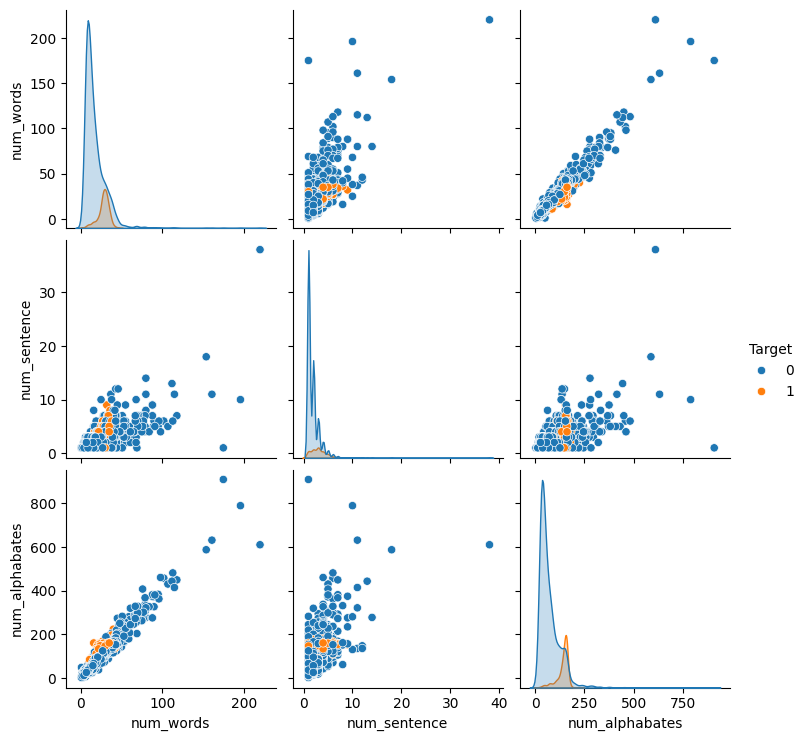

In [187]:
sns.pairplot(df, hue = 'Target')

<Axes: >

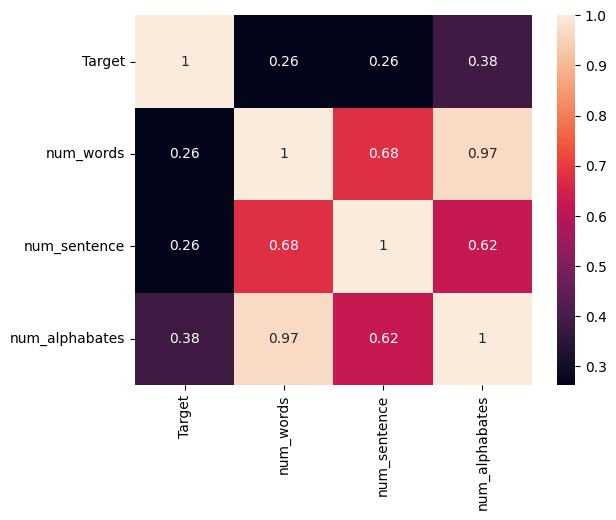

In [188]:
# plotting heat,map to visualize what we infer by looking at these plot and description of spam and ham data 
numeric_columns = ['Target','num_words','num_sentence','num_alphabates']
sns.heatmap(df[numeric_columns].corr(), annot = True)

# 3. Data Preprocessing 

In [189]:
# lower case
# tokenization
# Removing Special Characters
# Removing stop words and punctuation
# Stemming
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [190]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [191]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [192]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    z = []
    for i in y:
        if i not in stopwords.words('english') and i not in string.punctuation:
            
            z.append(i)
    x = []
    for i in z :
        x.append(ps.stem(i))
        
    return " ".join(x)  # joining all the list item with space between them 
        
        
    

In [193]:
transform_text('hii , how Are you satyajeet, are u dancing ')


'hii satyajeet u danc'

In [194]:
df['Transformed_text'] = df['SMS'].apply(transform_text)

In [195]:
df.head(2)

,Target,SMS,num_words,num_sentence,num_alphabates,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,2,29,ok lar joke wif u oni


In [196]:
# TO generate a word cloud
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height = 500 , min_font_size =10 , background_color = 'white')

In [197]:
spam_wc = wc.generate(df[df['Target'] == 1]['Transformed_text'].str.cat(sep = " "))
df[df['Target'] == 1]['Transformed_text'].str.cat(sep = " ")

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18 freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030 six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt messag click http england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq thank subscript rington uk mobil charg pleas confirm repli ye repli charg 07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow sm ac sptv new jersey devil detroit red w

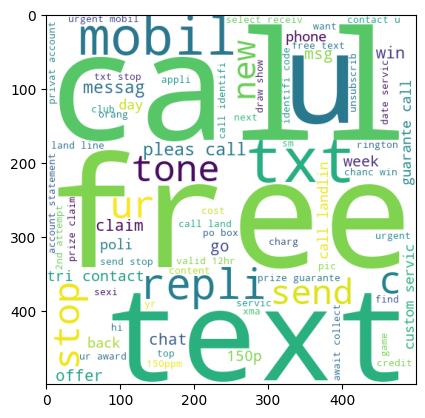

In [198]:
plt.imshow(spam_wc)

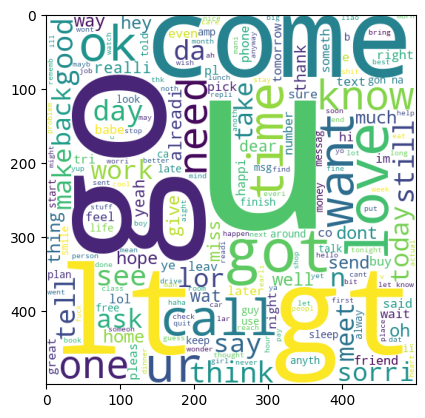

In [199]:
ham_wc = wc.generate(df[df['Target'] == 0]['Transformed_text'].str.cat(sep = " "))
plt.imshow(ham_wc)

In [200]:
# to check which word occurs most in spam and ham mesaages
all_words = []
for msg in df[df['Target'] ==1]['Transformed_text']:
    for word in msg.split():
        all_words.append(word)

# or all_words = nltk.word_tokenize(df[df['Target'] == 1]['Transformed_text'].str.cat(sep = " "))

In [201]:
all_words

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [202]:
# to get the info that which words occured most of the times
# pass a list and ...........
from collections import Counter
spam_occurence = Counter(all_words).most_common(30)
spam_occurence

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [203]:
occurence_df =pd.DataFrame(spam_occurence)

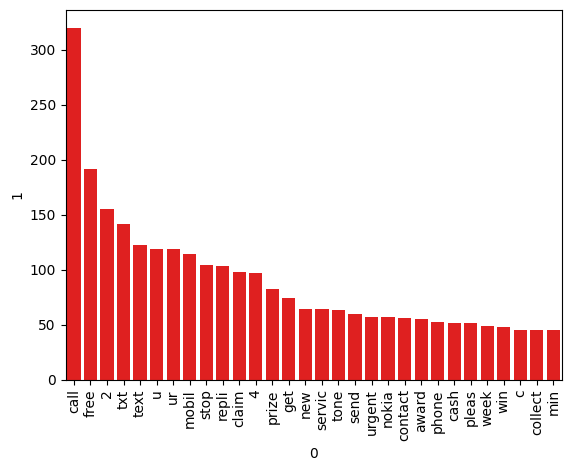

In [204]:

sns.barplot(data = occurence_df , x = occurence_df[0], y = occurence_df[1],color = 'red')
plt.xticks(rotation ='vertical')
plt.show()


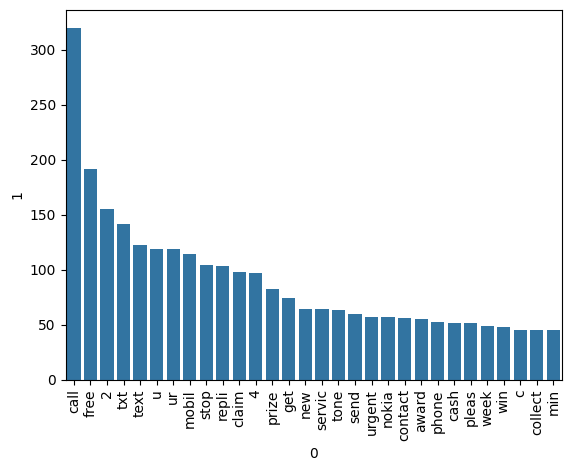

In [205]:
# same analysis for hem 
hem_all_words = []
for msg in df[df['Target'] ==0]['Transformed_text']:
    for word in msg.split():
        hem_all_words.append(word)

hem_occurence_df = pd.DataFrame(Counter(all_words).most_common(30))
sns.barplot(data = hem_occurence_df , x = hem_occurence_df[0], y = hem_occurence_df[1])
plt.xticks(rotation ='vertical')
plt.show()

### Analysis using CountVectorizer


In [206]:
# I need to vectorize the texts using 
#1. bag of words .(for each word counting the number of times it occured in the original singnal )
#2. tfidf etc 

In [207]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [208]:
X = cv.fit_transform(df['Transformed_text']).toarray() # result sparse array me milta hai to usko convert kar liya array mein

In [209]:
Y = df['Target']
Y.shape,X.shape

((5169,), (5169, 6708))

In [210]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

In [211]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [212]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [213]:
gnb.fit(X_train,Y_train)
mnb.fit(X_train,Y_train)
bnb.fit(X_train,Y_train)

BernoulliNB()

In [214]:
pred1 = gnb.predict(X_test)
pred2 = mnb.predict(X_test)
pred3 = bnb.predict(X_test)

In [215]:
print(accuracy_score(Y_test,pred1))
print(precision_score(Y_test,pred1))
confusion_matrix(Y_test,pred1)

0.8800773694390716
0.5315315315315315


array([[792, 104],
       [ 20, 118]], dtype=int64)

In [216]:
print(accuracy_score(Y_test,pred2))
print(precision_score(Y_test,pred2))
confusion_matrix(Y_test,pred2)

0.9642166344294004
0.8344370860927153


array([[871,  25],
       [ 12, 126]], dtype=int64)

In [217]:
print(accuracy_score(Y_test,pred3))
print(precision_score(Y_test,pred3))
confusion_matrix(Y_test,pred3)

0.9700193423597679
0.9734513274336283


array([[893,   3],
       [ 28, 110]], dtype=int64)

### Analysis using TfidVectorizer

In [231]:
# repeating the same process with tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)  # the result was coming best for max_feature = 3000
X_ = tf.fit_transform(df['Transformed_text']).toarray() # result sparse array me milta hai to usko convert kar liya array mei
Y_ = df['Target']
X_train_,X_test_,Y_train_,Y_test_ = train_test_split(X_,Y_, test_size = 0.2, random_state=2)

gnb.fit(X_train_,Y_train_)
mnb.fit(X_train_,Y_train_)
bnb.fit(X_train_,Y_train_)

pred1_ = gnb.predict(X_test_)
pred2_ = mnb.predict(X_test_)
pred3_ = bnb.predict(X_test_)




In [232]:
print(accuracy_score(Y_test_,pred1_))
print(precision_score(Y_test_,pred1_))
confusion_matrix(Y_test_,pred1_)

0.8694390715667312
0.5068493150684932


array([[788, 108],
       [ 27, 111]], dtype=int64)

In [233]:
print(accuracy_score(Y_test_,pred2_))
print(precision_score(Y_test_,pred2_))
confusion_matrix(Y_test_,pred2_)

0.9709864603481625
1.0


array([[896,   0],
       [ 30, 108]], dtype=int64)

In [234]:
print(accuracy_score(Y_test_,pred3_))
print(precision_score(Y_test_,pred3_))
confusion_matrix(Y_test_,pred3_)

0.9835589941972921
0.991869918699187


array([[895,   1],
       [ 16, 122]], dtype=int64)

In [235]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr , tpr ,_ = roc_curve(Y_test_ , pred2_)
auc_score = roc_auc_score(Y_test_,pred2_)
auc_score

0.8913043478260869

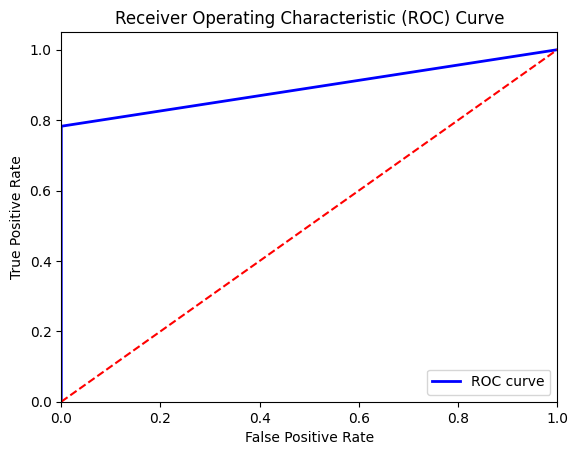

the auc_score is 0.8913043478260869


In [236]:
plt.plot(fpr,tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"the auc_score is {auc_score}")

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [238]:
svc = SVC(kernel = 'sigmoid', gamma =1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver ='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50 ,random_state=2)
abc = AdaBoostClassifier(n_estimators =50 , random_state= 2)
bc = BaggingClassifier(n_estimators =50 , random_state= 2)
etc = ExtraTreesClassifier(n_estimators =50 , random_state= 2)
gbdt = GradientBoostingClassifier(n_estimators =50 , random_state= 2)
xgb = XGBClassifier(n_estimators =50 , random_state= 2)

In [239]:
metric_dict = {
    'SVC' : svc,
    'KNC' : knc,
    'DTC' : dtc,
    'LRC' : lrc,
    'RFC' : rfc,
    'ABC' : abc,
    'BC' : bc,
    'ETC' : etc,
    'GbDT' : gbdt,
    'XGB' : xgb,
    'MNB' : mnb
}

In [240]:
def Classifier_Report(clf,X_train_,X_test_,Y_train_,Y_test_):
    clf.fit(X_train_,Y_train_)
    prediction = clf.predict(X_test_)
    accuracy = accuracy_score(Y_test_,prediction)
    precision = precision_score(Y_test_,prediction)

    return accuracy,precision
    

In [241]:
Classifier_Report(mnb,X_train_,X_test_,Y_train_,Y_test_)

(0.9709864603481625, 1.0)

In [242]:
accuracy_scores_3000 = []
precision_scores_3000 = []
for classifier_name, classifier in metric_dict.items():
    accuracy,precision = Classifier_Report(classifier,X_train_,X_test_,Y_train_,Y_test_)
    accuracy_scores_3000.append(accuracy)
    precision_scores_3000.append(precision)

C:\Users\rohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [243]:
# Creating New DataFrame to store the name of classifiers and their precisions and accuracy
Comparision_df = pd.DataFrame({'Algorithm':metric_dict.keys(),
                                 'Accuracy':accuracy_scores,
                                     'Precision':precision_scores,
                               'Accuracy_3000': accuracy_scores_3000,
                               'precision_3000': precision_scores_3000
                              })

In [244]:
Comparision_df.sort_values('Precision',ascending = False)

,Algorithm,Accuracy,Precision,Accuracy_3000,precision_3000
1,KNC,0.900387,1.000000,0.905222,1.000000
4,RFC,0.971954,1.000000,0.975822,0.982906
10,MNB,0.959381,1.000000,0.970986,1.000000
7,ETC,0.972921,0.982456,0.974855,0.974576
0,SVC,0.972921,0.974138,0.975822,0.974790
5,ABC,0.961315,0.945455,0.960348,0.929204
9,XGB,0.972921,0.943548,0.967118,0.926230
3,LRC,0.951644,0.940000,0.958414,0.970297
8,GbDT,0.952611,0.923810,0.946809,0.919192
6,BC,0.958414,0.862595,0.958414,0.868217


In [312]:
# using Voting Classifier 
classifiers = [('MNB',mnb),('RFC',rfc)]

In [313]:
from sklearn.ensemble import VotingClassifier

In [314]:
VC = VotingClassifier(estimators = classifiers, voting= 'hard') 

In [315]:
VC.fit(X_train,Y_train)

VotingClassifier(estimators=[('MNB', MultinomialNB()),
                             ('RFC',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))])

In [316]:
VC_precision = []
VC_accuracy = []

In [317]:
pred_vc_hard = VC.predict(X_test)

In [318]:
VC = VotingClassifier(estimators = classifiers, voting= 'soft')
VC.fit(X_train,Y_train)

VotingClassifier(estimators=[('MNB', MultinomialNB()),
                             ('RFC',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [319]:
pred_vc_soft = VC.predict(X_test)

In [320]:
acc = accuracy_score(Y_test,pred_vc_hard)
VC_accuracy.append(acc)
acc = accuracy_score(Y_test,pred_vc_soft)
VC_accuracy.append(acc)

prec = precision_score(Y_test,pred_vc_hard)
VC_precision.append(prec)
prec = precision_score(Y_test,pred_vc_soft)
VC_precision.append(prec)

In [321]:
dict = {'precision': VC_precision,
        'accuracy':VC_accuracy
       }

In [322]:
VC_metric_df = pd.DataFrame(dict,index=['Hard_VC','Soft_VC'] )

In [323]:
VC_metric_df

,precision,accuracy
Hard_VC,1.00000,0.970986
Soft_VC,0.96063,0.979691


In [311]:
import pickle
pickle.dump(tf,open('Vectorizer.pkl','wb'))
pickle.dump(mnb,open('Model.pkl','wb'))